In [1]:
%reset -f

import pandas as pd
import os
import numpy as np
from six.moves import xrange
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [20]:
def ability_level_mapper(data, groups=None, col='front', how='naive', n_level=19, invert=True):
    # the raw data is divided into groups according to its exc_num, ability levels are calculated respectively
    # how: 1 is mapping without any other processing, called 'naive'
    origin = data.copy()
    if groups == None:
        v_max = origin[col].max()
        v_min = origin[col].min()
        
        interval = (v_max- v_min)/n_level
        assert interval!=0, 'zero dividend'
        origin['performance'] = (origin[col]-v_min)/interval
        
        origin['performance'] = origin['performance'].astype(int)
        if invert:
            origin['performance'] = n_level-origin['performance']+1
        else:
            origin['performance'] = origin['performance']+1
        
        return origin
    
    if how == 1 or how=='naive':
        tmp = origin[col]
        for index, group in groups:
            
            v_max = group[col].max()
            v_min = group[col].min()
            
            interval = (v_max-v_min)/n_level
            
            assert interval!=0, 'zero dividend'
            
            origin.loc[index, col] = (origin.loc[index, col]-v_min)/interval
        origin[col] = origin[col].astype(int)
        if invert:
            origin['performance'] = n_level-origin[col]+1
            
        else:
            origin['performance'] = origin['performance']+1
        origin[col] = tmp
        
        return origin

In [21]:
all_data = pd.read_csv('../data/step1_clear_data.csv')
all_data.head()

,day,exc_num,exc_times,uid,velocity,force,front
0,1,1.1,1,4,0.021297,18.561272,0.000039
1,1,1.1,1,4,0.021297,18.561272,0.000078
2,1,1.1,1,4,0.023768,23.049513,0.000120
3,1,1.1,1,4,0.023768,23.049513,0.000164
4,1,1.1,1,4,0.031793,32.181287,0.000206


In [4]:
# tmp = all_data.set_index(['day', 'exc_num', 'uid', target_col])

In [29]:
all_data['vf'] = all_data['velocity']/(all_data['front']+0.1)

### average data

In [30]:
target_col = 'vf'
invert = False

item = all_data.reset_index()[['day', 'exc_num', 'uid', 'exc_times', target_col]].groupby(by=['day', 'exc_num', 'uid', 'exc_times']).mean()
item = ability_level_mapper(item, col='vf', invert=invert)
print(item['performance'].describe())
uid_avg_score_per_item = item.reset_index()[['day', 'exc_num', 'uid', 'performance']].groupby(by=['day', 'exc_num', 'uid']).mean()
uid_avg_score_per_item = uid_avg_score_per_item.reset_index()
# uid_avg_score_per_item.describe()

count    682.000000
mean       5.697947
std        3.359904
min        1.000000
25%        3.000000
50%        5.000000
75%        7.750000
max       20.000000
Name: performance, dtype: float64


In [31]:
uid_avg_score_per_item

,day,exc_num,uid,performance
0,1,1.1,1,6.000000
1,1,1.1,4,5.000000
2,1,1.1,5,7.000000
3,1,1.1,7,6.000000
4,1,1.2,1,5.666667
5,1,1.2,2,5.500000
6,1,1.2,3,12.000000
7,1,1.2,4,6.000000
8,1,1.2,5,5.500000
9,1,1.2,6,8.200000


In [34]:
uid_avg_score_per_item.to_csv('../data/step2_expected_performance.csv', index=False)

#### unidemention testing 

In [36]:
# check pearson coefficient between different items

tmp = uid_avg_score_per_item.reset_index()
# groups = tmp[(tmp['day']==1) & (tmp['exc_num']!=1.1)].groupby(by=['exc_num'])
# groups = tmp[(tmp['day']==2)].groupby(by=['exc_num'])
# groups = tmp[(tmp['day']==2) & (tmp['exc_num']>2)].groupby(by=['exc_num'])
# groups = tmp[(tmp['day']==3)].groupby(by=['exc_num'])
# groups = tmp[(tmp['day']==3) & (tmp['exc_num']>3)].groupby(by=['exc_num'])
# groups = tmp[(tmp['day']==4) & (tmp['exc_num']>4)].groupby(by=['exc_num'])
# groups = tmp[(tmp['day']==5) & ((tmp['exc_num']>4) | (tmp['exc_num']<2))].groupby(by=['exc_num'])
groups = tmp[(tmp['day']==5)].groupby(by=['exc_num'])
# groups = tmp[((tmp['day']==2) | (tmp['day']==3)) & (tmp['exc_num']==2.3)].groupby(by=['day', 'exc_num'])
for index1, group1 in groups:
    set1 = group1['uid'].tolist()

    for index2, group2 in groups:
        if index1==index2:
            continue
        else:
            set2 = group2['uid'].tolist()
            common_uid = list(set(set1).intersection(set2))
            l1 = group1.set_index(['uid']).loc[common_uid, 'performance']
            l2 = group2.set_index(['uid']).loc[common_uid, 'performance']
#             print(group1.set_index(['uid']).loc[common_uid])
#             print(group2.set_index(['uid']).loc[common_uid])
            pearson, p_vlaue = pearsonr(l1, l2)
            print(index1, index2)
            print(pearson)

1.5 2.1
0.574295068183
1.5 2.2
0.372254440323
1.5 2.3
0.616080721386
1.5 3.2
0.629160315932
1.5 4.1
0.115005557609
1.5 4.2
0.163269361252
1.5 4.3
0.276778610442
2.1 1.5
0.574295068183
2.1 2.2
0.878881952259
2.1 2.3
0.927487217826
2.1 3.2
0.786679000736
2.1 4.1
0.48750105425
2.1 4.2
0.37373385844
2.1 4.3
0.717003335296
2.2 1.5
0.372254440323
2.2 2.1
0.878881952259
2.2 2.3
0.970725343394
2.2 3.2
0.56811750477
2.2 4.1
0.339551559234
2.2 4.2
0.472221664066
2.2 4.3
0.87846723247
2.3 1.5
0.616080721386
2.3 2.1
0.927487217826
2.3 2.2
0.970725343394
2.3 3.2
0.850602406768
2.3 4.1
0.18633331177
2.3 4.2
0.357142857143
2.3 4.3
0.767608241278
3.2 1.5
0.629160315932
3.2 2.1
0.786679000736
3.2 2.2
0.56811750477
3.2 2.3
0.850602406768
3.2 4.1
0.1536611139
3.2 4.2
0.316648986279
3.2 4.3
0.41017354178
4.1 1.5
0.115005557609
4.1 2.1
0.48750105425
4.1 2.2
0.339551559234
4.1 2.3
0.18633331177
4.1 3.2
0.1536611139
4.1 4.2
0.264628062012
4.1 4.3
0.536770455349
4.2 1.5
0.163269361252
4.2 2.1
0.37373385844
4.

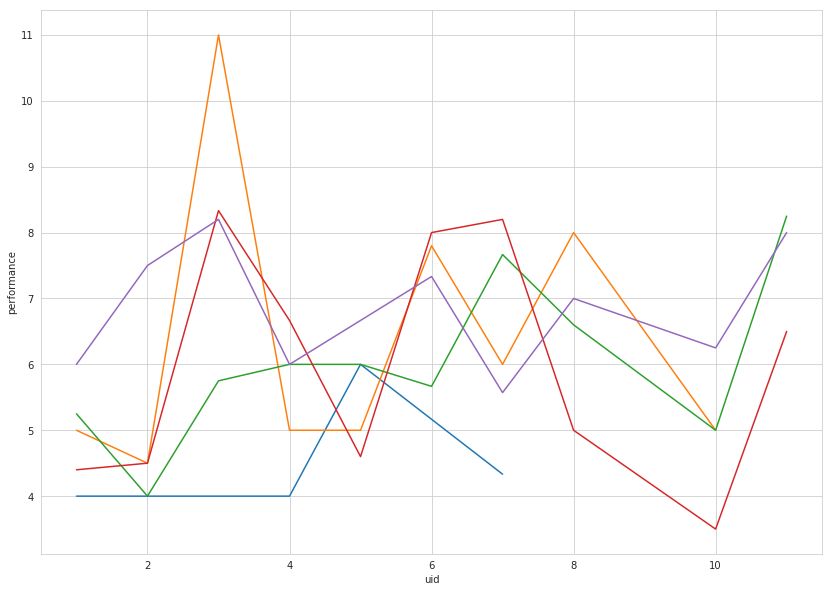

In [27]:
groups = tmp[(tmp['day']==1) & (tmp['exc_num']>1)].groupby(by=['exc_num'])
sns.set_style('whitegrid')
f, ax= plt.subplots(figsize = (14, 10))
for index, group in groups:
#     print(group)
    
    ax = sns.lineplot(x='uid', y='performance', data=group.reset_index(drop=False))
#     ax.set_title('exc_num is'+str(index))

#### item effectivity

In [28]:
exc_nums = tmp['exc_num'].unique()
for en in exc_nums:
    data = tmp[tmp['exc_num']==en]
    print(data)
#     sns.set_style('whitegrid')
#     f, ax= plt.subplots(figsize = (14, 10))
#     ax = sns.lineplot(x='uid', y=target_col, hue='day', data=data.reset_index())
#     ax.set_title('exc_num is'+str(en))

    index  day  exc_num  uid  performance
0       0    1      1.1    1     4.000000
1       1    1      1.1    4     4.000000
2       2    1      1.1    5     6.000000
3       3    1      1.1    7     4.333333
43     43    2      1.1    7     4.500000
44     44    2      1.1   10     4.000000
45     45    2      1.1   11     9.000000
    index  day  exc_num  uid  performance
4       4    1      1.2    1          5.0
5       5    1      1.2    2          4.5
6       6    1      1.2    3         11.0
7       7    1      1.2    4          5.0
8       8    1      1.2    5          5.0
9       9    1      1.2    6          7.8
10     10    1      1.2    7          6.0
11     11    1      1.2    8          8.0
12     12    1      1.2   10          5.0
46     46    2      1.2    3          7.0
47     47    2      1.2    6          4.0
48     48    2      1.2    7          6.0
49     49    2      1.2   11          8.0
    index  day  exc_num  uid  performance
13     13    1      1.3    1     5